In [1]:
# подключаем разрешенные библиотеки
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# подключаем наши модулю
import NearestNeighbors
import CrossValidation
import Distances

In [2]:
# загружаем объекты
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# преобразуем строки в int
y = y.astype(np.int)

print("Мы имеем %d объектов, каждый из которых содержит %d признака" % (X.shape[0], X.shape[1]))

Мы имеем 70000 объектов, каждый из которых содержит 784 признака


In [3]:
# разбиваем на обучающую и тестовую выборки
train_X = X[0:60000]
train_y = y[0:60000]
validation_X = X[60000:70000]
validation_y = y[60000:70000]

In [28]:
# кол-во случайно отобранных признаков
k = 5
featureNumber = [10, 20, 100]
strategies = ['my_own'] #, 'brute', 'kd_tree', 'ball_tree']
res = {}
times = {}
for fn in featureNumber:
    rndFeatures = np.random.randint(0, X.shape[1], size=fn)
    tmpTrain_X = train_X[:, rndFeatures]
    tmpValidation_X = validation_X[:, rndFeatures]
    res[fn] = []
    times[fn] = []
    for strategy in strategies:
        classifier = NearestNeighbors.KNNClassifier(
            k = k, 
            strategy = strategy, 
            metric = 'euclidean', 
            weights = False,    
            test_block_size = 10
        )
        classifier.fit(tmpTrain_X, train_y)

        start_time = time.time()
        res[fn].append(classifier.find_kneighbors(tmpValidation_X))
        times[fn].append(time.time() - start_time)

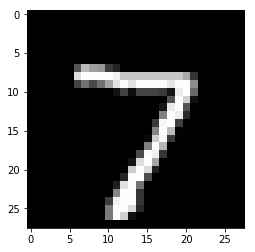

my_own


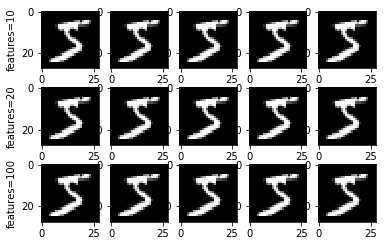

In [29]:
plt.imshow(validation_X[0].reshape((28, 28)), cmap='gray')
plt.show()

for i in range(len(strategies)):
    print (strategies[i])

    fig, ax = plt.subplots(nrows = len(featureNumber), ncols = k)
    for row in range(len(featureNumber)):
        ax[row, 0].set(ylabel="features=%d" % featureNumber[row])
        for col in range(k):
            ax[row, col].imshow(train_X[res[featureNumber[row]][i][1][0][col]].reshape((28, 28)), cmap='gray')
    plt.show()

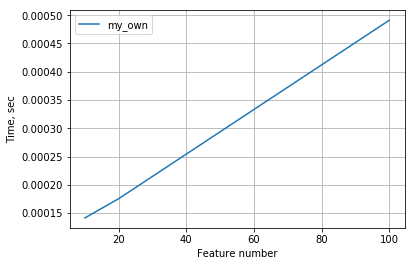

In [30]:
for st in range(len(strategies)):
    plt.plot(featureNumber, [times[t][st] for t in times], label=strategies[st])

plt.xlabel('Feature number')
plt.ylabel('Time, sec')
plt.grid()    
plt.legend()
plt.show()